# GRIP-The Sparks Foundation
Task - 5 - EDA - Sports
by Krishna Chaitanya Velagapudi

Exploratory Data Analysis on dataset Indian Premier League

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Loading the Data

In [2]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Data Pre-processing

In [5]:
#checking for NULL Values 
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [6]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
print(len(deliveries))
print(len(matches))

179078
756


In [8]:
deli=deliveries.drop(['player_dismissed','dismissal_kind','fielder'],axis=1)
mat=matches.drop(['umpire3'],axis=1)
deli.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [9]:
mat=mat.dropna(subset=['winner','city','umpire1','umpire2'])
mat.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

Most number of wins

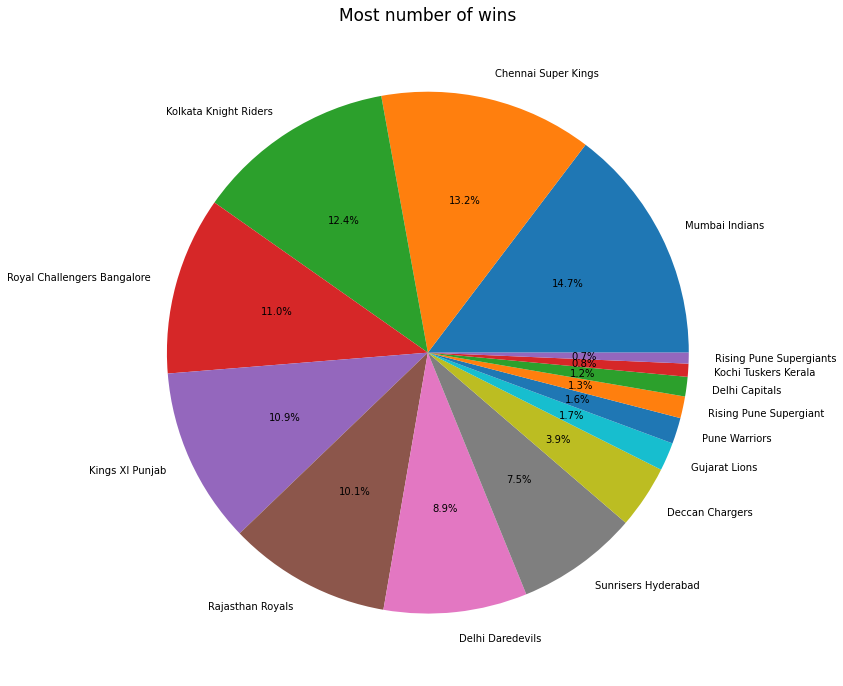

In [10]:
winners= pd.DataFrame({'Winner':mat['winner']})
win=winners.value_counts()
labels=[x[0] for x in win.keys()]
bar,ax=plt.subplots(figsize=(20,12))
ax=plt.pie(x=win,autopct='%.1f%%',labels=labels)
plt.title('Most number of wins',fontsize=17)
plt.show()

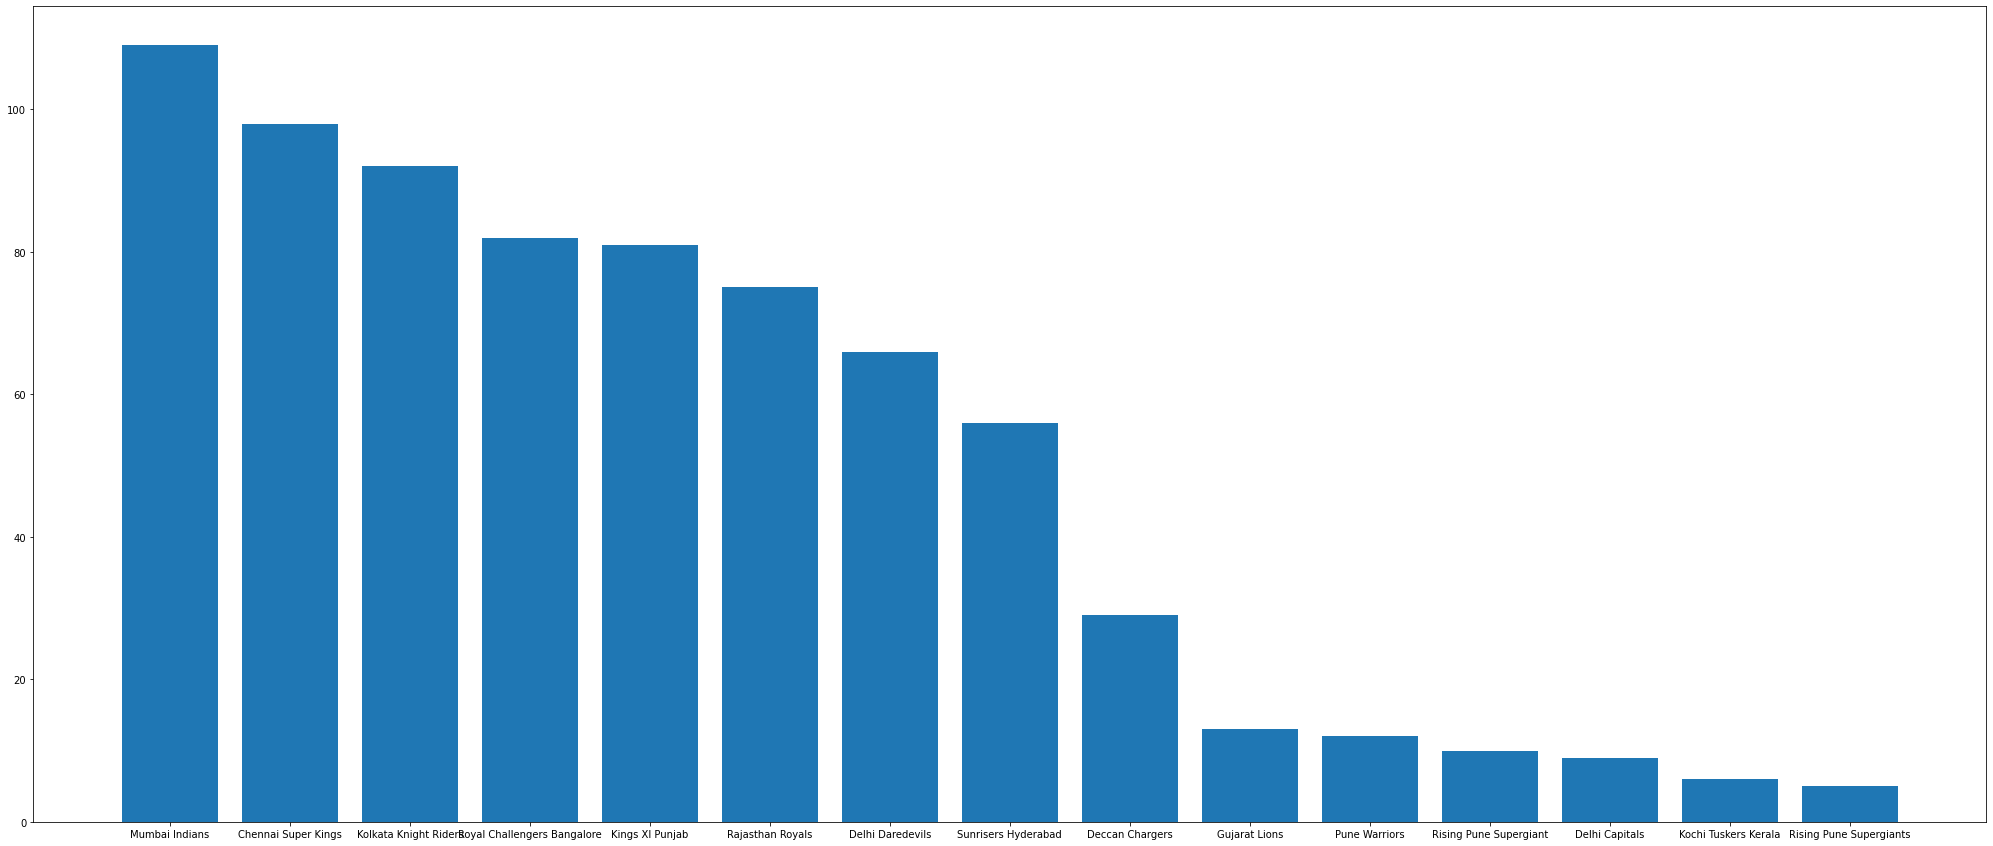

In [11]:
fig = plt.figure(figsize =(35,15))
plt.bar(labels,win)
plt.show()

Toss Decision

In [12]:
teams=mat['toss_winner'].unique()
decision_making=pd.DataFrame([],columns=['Toss Winner','Decision','Times'])
for id,element in enumerate(teams):
    bat=mat[(mat['toss_winner']==element) & (mat['toss_decision']=='bat')]
    field=mat[(mat['toss_winner']==element) & (mat['toss_decision']=='field')]

    decision_making=decision_making.append({'Toss Winner':element,'Decision':'bat','Times':bat['toss_winner'].count()},ignore_index=True)
    decision_making=decision_making.append({'Toss Winner':element,'Decision':'field','Times':bat['toss_winner'].count()},ignore_index=True)

In [13]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,19
1,Royal Challengers Bangalore,field,19
2,Rising Pune Supergiant,bat,0
3,Rising Pune Supergiant,field,0
4,Kolkata Knight Riders,bat,29
5,Kolkata Knight Riders,field,29
6,Kings XI Punjab,bat,26
7,Kings XI Punjab,field,26
8,Sunrisers Hyderabad,bat,19
9,Sunrisers Hyderabad,field,19


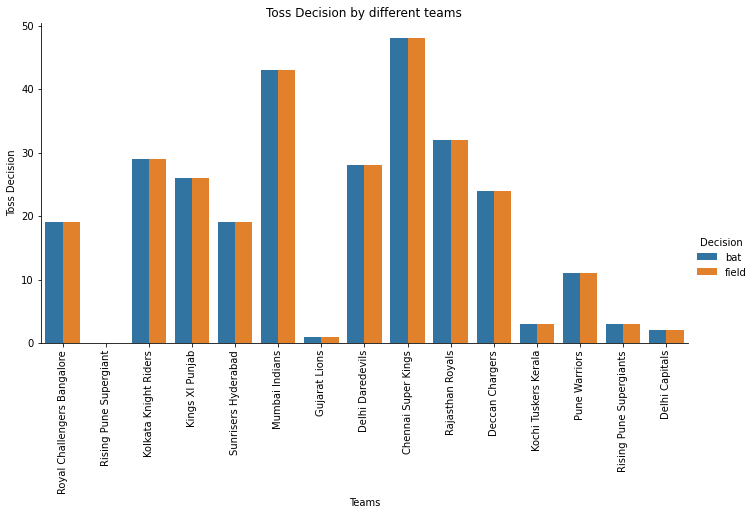

In [16]:
import seaborn as sns
sns.catplot(x='Toss Winner',y='Times',hue='Decision',data=decision_making,kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)
plt.title('Toss Decision by different teams')
plt.xlabel('Teams')
plt.ylabel('Toss Decision')
plt.show()

Top 10 Successful Players in the IPL

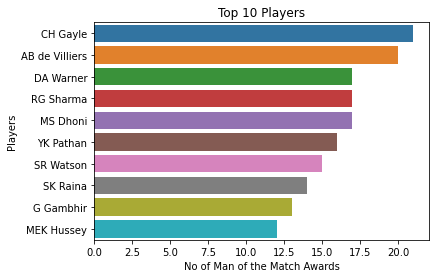

In [17]:
sns.barplot(x=mat['player_of_match'].value_counts().head(10).values,y=mat['player_of_match'].value_counts().head(10).index,data=mat)
plt.title('Top 10 Players')
plt.xlabel('No of Man of the Match Awards')
plt.ylabel('Players')
plt.show()

Top 10 Famous Venues

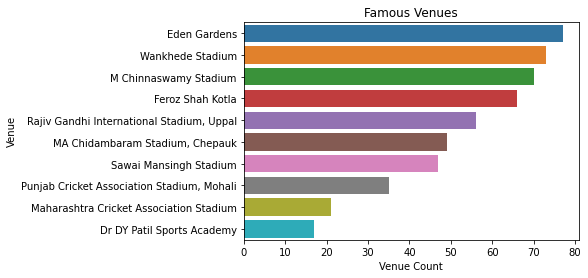

In [18]:
sns.barplot(x=mat['venue'].value_counts().head(10).values,y=mat['venue'].value_counts().head(10).index,data=mat)
plt.title('Famous Venues')
plt.xlabel('Venue Count')
plt.ylabel('Venue')
plt.show()

Top 5 First Umpires

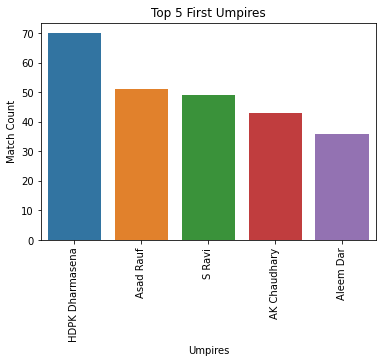

In [19]:
sns.barplot(x=mat['umpire1'].value_counts().head().index,y=mat['umpire1'].value_counts().head().values,data=mat)
plt.xticks(rotation=90)
plt.title('Top 5 First Umpires')
plt.xlabel('Umpires')
plt.ylabel('Match Count')
plt.show()

Top 5 Second Umpires

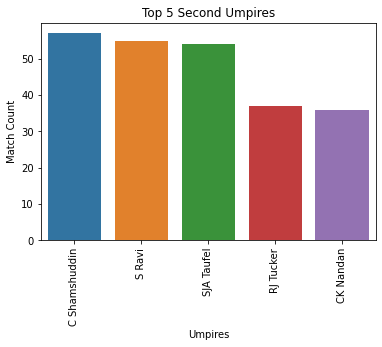

In [20]:
sns.barplot(x=mat['umpire2'].value_counts().head().index,y=mat['umpire2'].value_counts().head().values,data=mat)
plt.xticks(rotation=90)
plt.title('Top 5 Second Umpires')
plt.xlabel('Umpires')
plt.ylabel('Match Count')
plt.show()

Players a company should endorse for its products

In [21]:
print(mat['player_of_match'].value_counts().head(10).index)

Index(['CH Gayle', 'AB de Villiers', 'DA Warner', 'RG Sharma', 'MS Dhoni',
       'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'MEK Hussey'],
      dtype='object')


So the players are CH Gayle, AB de Villiers, MS Dhoni, DA Warner,  Rohit Sharma, YK Pathan, Shane Watson, Suresh Raina, Gautam Gambhir and Virat Kohli

Teams a company should endorse for its products

In [22]:
mat['winner'].value_counts().head(3).index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders'], dtype='object')

So the teams are Mumbai Indians, Chennai Super Kings and Kolkata Knight Riders

In [23]:
t=deli['bowling_team'].unique()
dm=pd.DataFrame([],columns=['Bowling Team','noball_runs','wide_runs'])
for id,element in enumerate(t):
    noball_runs=deli[(deli['bowling_team']==element) & (deli['noball_runs']>0)]
    wide_runs=deli[(deli['bowling_team']==element) & (deli['wide_runs']>0)]
    dm=dm.append({'Bowling Team':element,'noball_runs':noball_runs['bowling_team'].count(),'wide_runs':
    wide_runs['bowling_team'].count()},ignore_index=True)
dm

,Bowling Team,noball_runs,wide_runs
0,Royal Challengers Bangalore,91,708
1,Sunrisers Hyderabad,30,315
2,Rising Pune Supergiant,1,62
3,Mumbai Indians,105,734
4,Kolkata Knight Riders,77,586
5,Gujarat Lions,7,91
6,Kings XI Punjab,96,658
7,Delhi Daredevils,86,550
8,Chennai Super Kings,59,568
9,Rajasthan Royals,68,570


Runs conceded through No-Balls by different teams

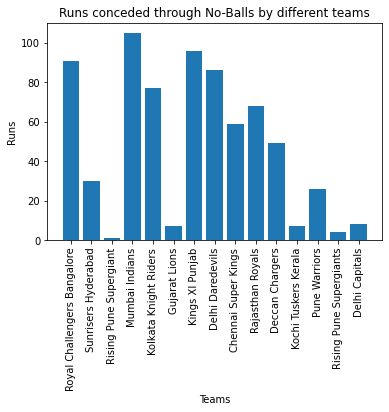

In [24]:
plt.bar(dm['Bowling Team'],dm['noball_runs'])
plt.xticks(rotation=90)
plt.title('Runs conceded through No-Balls by different teams')
plt.xlabel('Teams')
plt.ylabel('Runs')
plt.show()

Runs conceded through Wide Balls by different teams

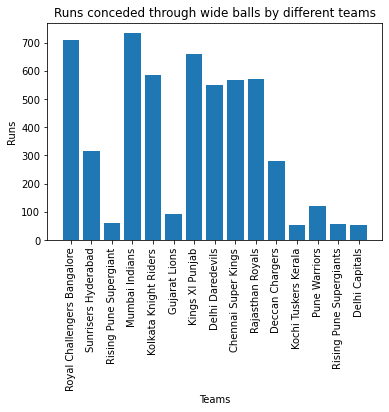

In [25]:
plt.bar(dm['Bowling Team'],dm['wide_runs'])
plt.xticks(rotation=90)
plt.title('Runs conceded through wide balls by different teams')
plt.xlabel('Teams')
plt.ylabel('Runs')
plt.show()